# Extracting Health Index Score from Legatum Prosperity Index

https://www.prosperity.com/rankings

In [44]:
from IPython.display import Image

In [7]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [8]:
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
import pandas as pd
import time

In [9]:
from webdriver_manager.chrome import ChromeDriverManager

wd = webdriver.Chrome(ChromeDriverManager().install(), options=options)

wd.get("https://www.prosperity.com/rankings")

C:\Users\sung2_8l7o06c\AppData\Local\Temp\ipykernel_5392\2164173990.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(ChromeDriverManager().install(), options=options)


### Select index instead of ranking

In [29]:
switch = wd.find_element(By.XPATH, '/html/body/div[1]/main/div/div[1]/div/div/div[1]/div/div/div/div/div[2]/div[1]/div/div/div/div/div[5]/div/div/div/div/div/div/div')
switch.click()

### Get the table data

In [30]:
table = wd.find_element(By.XPATH, '/html/body/div[1]/main/div/div[1]/div/div/div[1]/div/div/div/div/div[1]/div/div')
table.text

"SCORE\nCOUNTRY\n    ADJUST PILLAR WEIGHTING?\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\nx3\nx2\nx1\nx0.5\noff\n84.55\nDenmark\n92.59\n94.09\n89.45\n82.56\n82.42\n79.64\n78.79\n76.81\n95.77\n81.07\n87.48\n73.94\n83.67\nSweden\n90.97\n91.90\n86.41\n78.29\n82.81\n75.54\n79.67\n76.18\n95.33\n82.28\n85.92\n78.74\n83.59\nNorway\n93.30\n94.10\n89.66\n79.03\n82.24\n75.95\n75.87\n77.25\n94.70\n82.98\n85.68\n72.37\n83.47\nFinland\n89.56\n91.96\n90.41\n77.27\n84.12\n77.25\n78.77\n70.28\n94.46\n81.19\n88.38\n77.99\n83.42\nSwitzerland\n95.66\n87.50\n87.67\n69.14\n80.81\n83.84\n78.65\n79.71\n94.66\n82.11\n87.72\n73.60\n82.32\nNetherlands\n91.19\n90.08\n87.34\n74.03\n84.11\n79.09\n80.82\n74.34\n95.86\n82.05\n86.43\n62.49\n81.83\nLuxembourg\n96.32\n89.20\n86.31\n66.60\n78.91\n80.72\n80.03\n76.

In [31]:
data = table.text

In [32]:
data = data.split('\n')

In [36]:
data[:65]

['SCORE',
 'COUNTRY',
 '    ADJUST PILLAR WEIGHTING?',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 'x3',
 'x2',
 'x1',
 'x0.5',
 'off',
 '84.55',
 'Denmark']

In [42]:
data[63:]

# Now we know that the data start from index 63

['83.84',
 '78.65',
 '79.71',
 '94.66',
 '82.11',
 '87.72',
 '73.60',
 '82.32',
 'Netherlands',
 '91.19',
 '90.08',
 '87.34',
 '74.03',
 '84.11',
 '79.09',
 '80.82',
 '74.34',
 '95.86',
 '82.05',
 '86.43',
 '62.49',
 '81.83',
 'Luxembourg',
 '96.32',
 '89.20',
 '86.31',
 '66.60',
 '78.91',
 '80.72',
 '80.03',
 '76.93',
 '94.56',
 '81.59',
 '78.79',
 '71.98',
 '81.02',
 'Iceland',
 '91.64',
 '88.74',
 '83.30',
 '77.75',
 '79.20',
 '72.86',
 '76.07',
 '69.92',
 '93.82',
 '82.72',
 '85.19',
 '71.01',
 '80.81',
 'Germany',
 '87.92',
 '87.70',
 '84.39',
 '65.96',
 '78.87',
 '79.70',
 '80.23',
 '73.96',
 '94.42',
 '81.41',
 '83.45',
 '71.69',
 '80.47',
 'New Zealand',
 '85.07',
 '87.56',
 '87.19',
 '79.88',
 '82.58',
 '72.82',
 '74.60',
 '69.88',
 '90.66',
 '79.84',
 '83.89',
 '71.71',
 '80.31',
 'Ireland',
 '90.97',
 '88.59',
 '81.72',
 '67.73',
 '80.43',
 '75.29',
 '74.07',
 '77.81',
 '92.65',
 '80.04',
 '85.00',
 '69.48',
 '79.95',
 'United Kingdom',
 '87.63',
 '85.64',
 '80.63',
 '67.77'

In [38]:
data = data[63:]

### Get the data only the health data

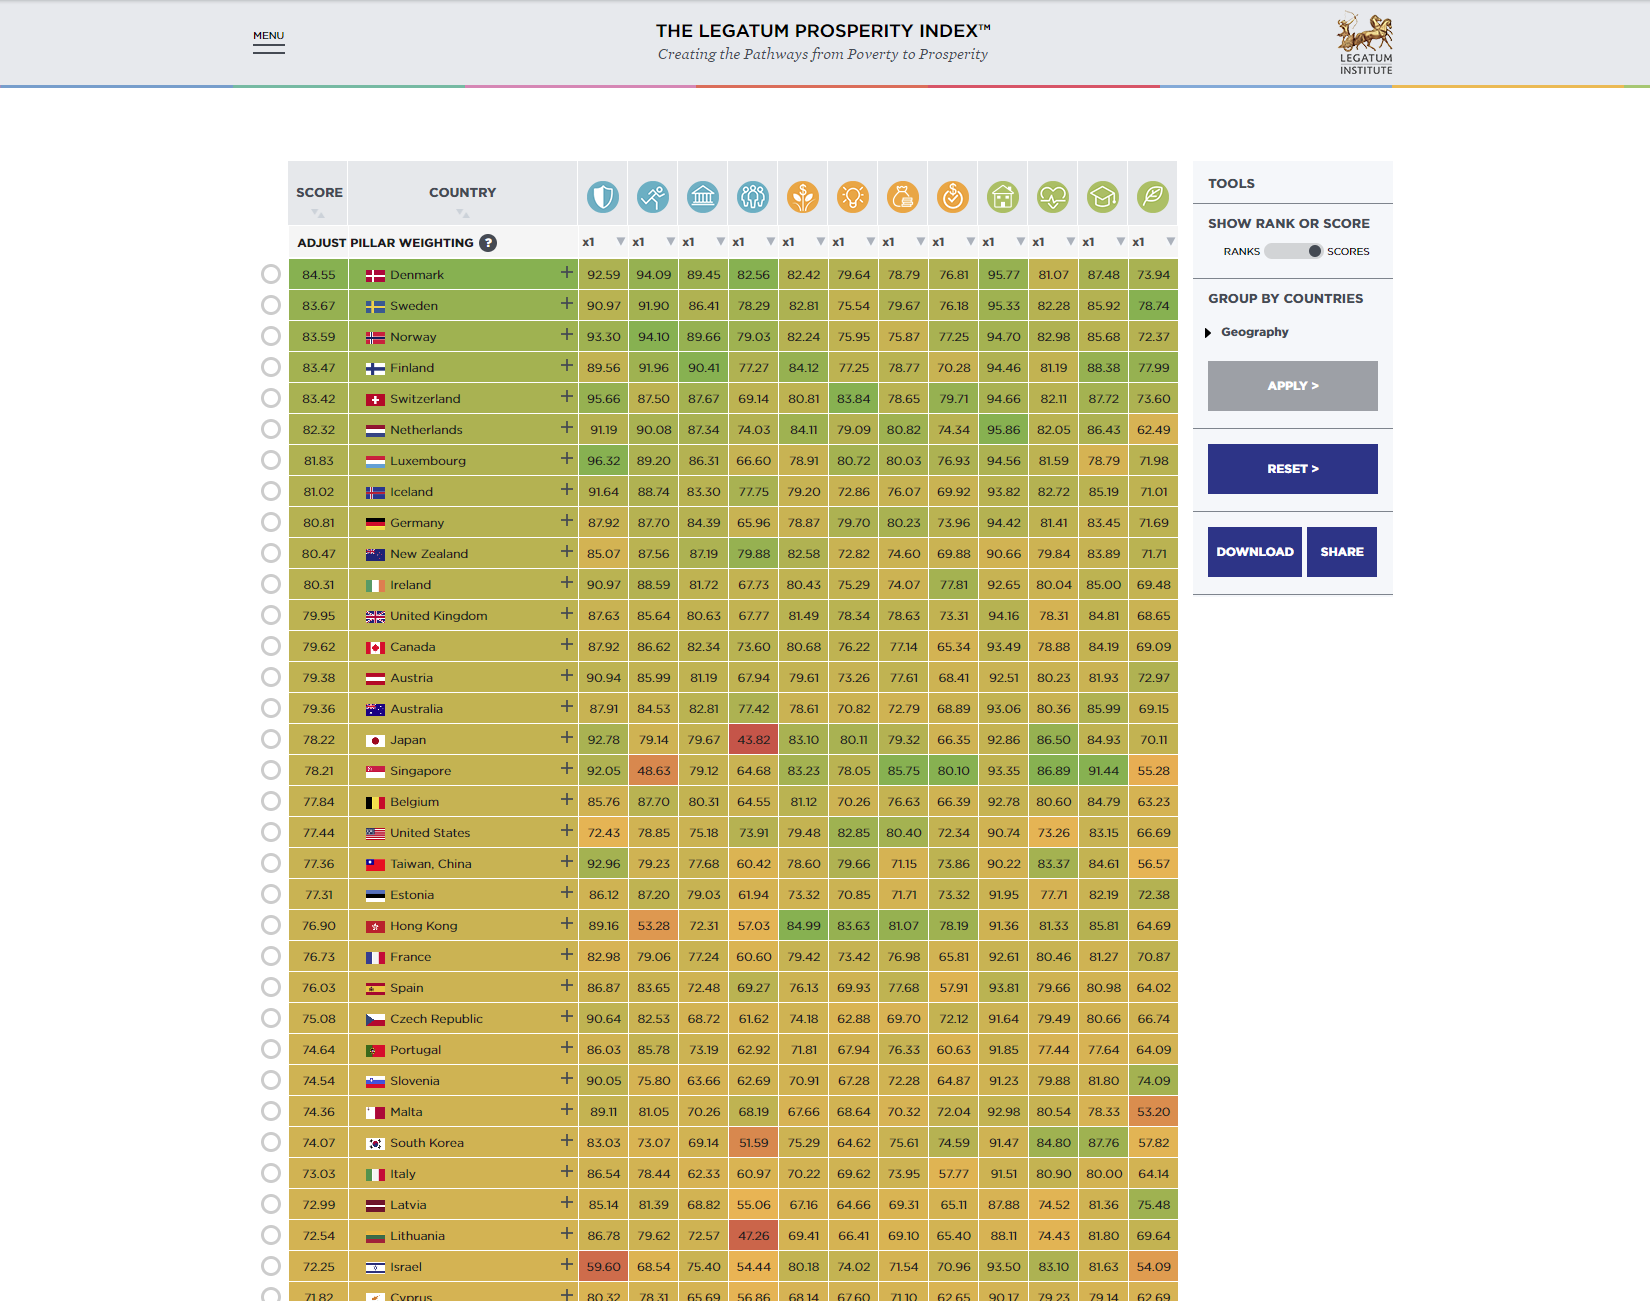

In [45]:
Image('./attachments/prosperity index ranking.PNG')

From above, each row contains of the weighted score, country name, and 12 individual index (14 data per row). Our data of interest is the country name (2nd column) and health index (12th column)

In [40]:
len(data)%14

0

In [49]:
country = [data[i] for i in range(1, len(data), 14)]
health_index = [data[i] for i in range(11, len(data), 14)]

In [51]:
import pandas as pd

data = pd.DataFrame({'country': country, 'health_index': health_index})
data.head()

,country,health_index
0,Denmark,81.07
1,Sweden,82.28
2,Norway,82.98
3,Finland,81.19
4,Switzerland,82.11


In [59]:
data = data.sort_values('health_index', ascending=False).reset_index(drop=True)
data.head(10)

,country,health_index
0,Singapore,86.89
1,Japan,86.50
2,South Korea,84.80
3,"Taiwan, China",83.37
4,China,83.11
5,Israel,83.10
6,Norway,82.98
7,Iceland,82.72
8,Sweden,82.28
9,Switzerland,82.11


In [60]:
data.shape

(167, 2)

In [62]:
data.isna().sum().sum()

0

### Export the CSV

In [63]:
data.to_csv('./dataset/legatum prosperity health index.csv')